# 세미프로젝트_E조(MGP조)

## 주제 : <작은 도서관 운영 실태 분석 및 시각화>

---------------------------------

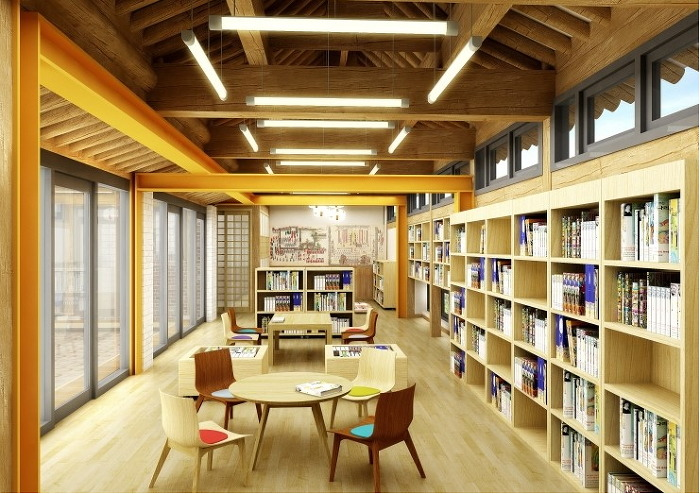

* 작은도서관은 주민의 참여와 자치를 기반으로 **지역사회의 생활 친화적 도서관 문화의 향상**을 주된 목적으로 하는 공공도서관이다. 


* 작은 도서관의 유형은 **사립** 또는 **공립** 크게 두가지로 구분되며, 다음 두가지의 조건을 갖추어야 한다.


        1. 건물면적 33(m2) 이상 (10평 이상)
        2. 자료 1,000권 이상

---------------------------------

### 주제선정 배경

1. 이용자 수 감소에 따른 ‘작은 도서관’ 지원금 중단 이슈

    서울도서관은 매년 자치구가 관리하는 작은 도서관 실적을 평가해 전체 작은도서관 중 35% 내외 도서관을 대상으로 1관당 평균 150여만원의 운영비를 지원해왔다. 
    
    그러나 올해는 **이용자 수와 대출권수가 저조**하다는 이유로 **관련예산을 배정하지 않아** 비판이 일었다. 

2. 독서 형태의 다양화 

    2021년 국민 독서실태 조사 결과, 2021년 성인의 연간 독서율은 독서 매체별로 '종이책' 40.7%, '전자책' 19.0%, '오디오북' 4.5%로 나타났다.     
    
    직전 조사인 2019년 대비 **종이책은 11.4%p 감소**했고, **전자책은 2.5%p, 오디오북은 1.0%p 증가**한 수치다.

### 목적 및 대상

#### - **목적** 

    : 도서관 운영 실태와 독서 인식 변화 데이터를 분석하여 작은 도서관 지원 방향을 제안하고자 한다.


#### - **대상** 

    :  작은 도서관 운영자 및 공공도서관 관련 행정부서.

---------------------------------

### 처리 사항

1. 필요 데이터를 모두 수집

    - 작은 도서관 및 공공 도서관 운영 현황 
    - 국민독서실태조사 설문조사 
    
    
2. 작은 도서관, 공공도서관의 운영 현황과 국민들의 독서인식 변화를 확인


3. 결과를 시각화

### 활용 데이터


   1) **작은 도서관 통계 결과표** (2017-2021년) _ 국가도서관통계시스템 
    (https://www.libsta.go.kr/statistics/national/main)
    
   2) **공공 도서관 통계 결과표** (2017-2021년) _ 국가도서관통계시스템
    (https://www.libsta.go.kr/statistics/national/main)

   3) **국민독서실태조사** (2017년,2019년,2021년) _ 마이크로데이터 통합서비스
    (https://mdis.kostat.go.kr/index.do)


---------------------------------

## 1. 데이터 전처리

In [1]:
import pandas as pd
import numpy as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
pd.set_option('display.max_columns', 50)

### 1) 작은 도서관

### 2) 공공 도서관

### 3) 국민독서실태조사

- 국민독서실태조사 성인/학생 2017년, 2019년, 2021년 csv파일 불러오기

In [5]:
temp1 = pd.read_csv('data/2017_Stu.csv',encoding='cp949')
temp2 = pd.read_csv('data/2019_Stu.csv',encoding='cp949')
temp3 = pd.read_csv('data/2021_Stu.csv',encoding='cp949')
temp4 = pd.read_csv('data/2017_Adult.csv',encoding='cp949')
temp5 = pd.read_csv('data/2019_Adult.csv',encoding='cp949')
temp6 = pd.read_csv('data/2021_Adult.csv',encoding='cp949')

In [7]:
# 컬럼, 데이터 개수 확인
temp1.info()
temp2.info()
temp3.info()
temp4.info()
temp5.info()
temp6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Columns: 123 entries, 학교구분 to 가중치
dtypes: float64(83), int64(40)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Columns: 199 entries, 학교 구분 to 가중치
dtypes: float64(142), int64(57)
memory usage: 4.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Columns: 188 entries, 학교 구분 to 가중치
dtypes: float64(120), int64(68)
memory usage: 4.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 105 entries, 지역 to 가중치
dtypes: float64(71), int64(34)
memory usage: 4.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 163 entries, 지역 to 가중치
dtypes: float64(112), int64(51)
memory usage: 7.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 179 entries, 조사구 유형 to 가중치
dtypes: float64(114), int64(65)
memory usage: 8.2 MB


### ①학생 독서실태조사

- 필요한 컬럼값만 추출하여 데이터프레임 형성

In [8]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경
Stu_2017 = temp1.iloc[:,[0,2,4,12,14,15,26,27,30,31,32,33,34,35,36,37,62,63,64,65,66]].fillna(0).astype('int')
Stu_2017.columns = ['학교구분','성별','학교 소재지','독서 빈도','독서장애요인1','독서장애요인2','도서 선택시 이용정보1','도서 선택시 이용정보2',
                    '도서 입수경로1','도서 입수경로2','초등 독서분야 선호도1','초등 독서분야 선호도2','초등 독서분야 선호도3','중고등 독서분야 선호도1',
                    '중고등 독서분야 선호도2','중고등 독서분야 선호도3','학교 밖 도서관이용경험','주이용 도서관 종류1','주이용 도서관 종류2','이용 이유','비이용 이유']

# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Stu_2017['연도'] = 2017


In [9]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경
Stu_2019 = temp2.iloc[:,[0,2,4,8,13,18,23,28,33,38,43,48,55,56,57,73,74,77,78,79,80,81,82,83,84,115,116,117,118,119,120,121]].fillna(0).astype('int')
Stu_2019.columns = ['학교구분','성별','학교 소재지','종이책 독서 빈도','전자책 독서 빈도','오디오북 이용 빈도','종이신문','인터넷신문','종이잡지','웹진','만화책','웹툰','독서선호도',
                    '독서장애요인1','독서장애요인2','도서 선택시 이용정보1','도서 선택시 이용정보2','도서 입수경로1','도서 입수경로2',
                    '초등 독서분야 선호도1','초등 독서분야 선호도2','초등 독서분야 선호도3','중고등 독서분야 선호도1',
                    '중고등 독서분야 선호도2','중고등 독서분야 선호도3','학교 밖 도서관이용경험','주이용 도서관 종류1',
                    '주이용 도서관 종류2','월 평균 이용빈도','연 평균 이용빈도','이용 이유','비이용 이유']

# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Stu_2019['연도'] = 2019

# 당해 데이터만 도서 종류별 독서 빈도 질문 : 종류별 빈도값 -> 전체 독서 빈도
Stu_2019['독서 빈도'] = Stu_2019[['종이책 독서 빈도','전자책 독서 빈도','오디오북 이용 빈도','종이신문','인터넷신문','종이잡지','웹진','만화책','웹툰']].min(axis=1)
Stu_2019.drop(['종이책 독서 빈도','전자책 독서 빈도','오디오북 이용 빈도','종이신문','인터넷신문','종이잡지','웹진','만화책','웹툰'], axis=1, inplace=True)

In [10]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경
Stu_2021 = temp3.iloc[:,[0,2,4,38,40,41,42,54,55,58,59,60,61,62,63,64,65,96,97,98,99,100,101,102]].fillna(0).astype('int')
Stu_2021.columns = ['학교구분','성별','학교 소재지','독서 빈도','독서선호도',
                    '독서장애요인1','독서장애요인2','도서 선택시 이용정보1','도서 선택시 이용정보2','도서 입수경로1','도서 입수경로2',
                    '초등 독서분야 선호도1','초등 독서분야 선호도2','초등 독서분야 선호도3','중고등 독서분야 선호도1',
                    '중고등 독서분야 선호도2','중고등 독서분야 선호도3','학교 밖 도서관이용경험','주이용 도서관 종류1',
                    '주이용 도서관 종류2','월 평균 이용빈도','연 평균 이용빈도','이용 이유','비이용 이유']

# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Stu_2021['연도'] = 2021

In [11]:
# 컬럼값 확인
Stu_2017.info()
Stu_2019.info()
Stu_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   학교구분           3329 non-null   int32
 1   성별             3329 non-null   int32
 2   학교 소재지         3329 non-null   int32
 3   독서 빈도          3329 non-null   int32
 4   독서장애요인1        3329 non-null   int32
 5   독서장애요인2        3329 non-null   int32
 6   도서 선택시 이용정보1   3329 non-null   int32
 7   도서 선택시 이용정보2   3329 non-null   int32
 8   도서 입수경로1       3329 non-null   int32
 9   도서 입수경로2       3329 non-null   int32
 10  초등 독서분야 선호도1   3329 non-null   int32
 11  초등 독서분야 선호도2   3329 non-null   int32
 12  초등 독서분야 선호도3   3329 non-null   int32
 13  중고등 독서분야 선호도1  3329 non-null   int32
 14  중고등 독서분야 선호도2  3329 non-null   int32
 15  중고등 독서분야 선호도3  3329 non-null   int32
 16  학교 밖 도서관이용경험   3329 non-null   int32
 17  주이용 도서관 종류1    3329 non-null   int32
 18  주이용 도서관 종류2    3329 non-null   int32
 19  이용 이유 

- 데이터값 표준화

In [12]:
# 연도별 답변 코드와 코드의미가 달라 replace를 통해 코드의미 통일

for i in range(1,3):
    Stu_2017[f'독서장애요인{i}'].replace({4:3,5:4,6:5,7:6,8:7,9:7,10:8,11:9,12:10,13:11},inplace=True)
    Stu_2019[f'독서장애요인{i}'].replace({4:3,5:4,6:5,7:6,8:7,9:7,10:8,11:10,12:11},inplace=True)
    Stu_2021[f'독서장애요인{i}'].replace({3:2,4:3,5:4,6:5,7:6,8:7,9:7,10:8,11:10,12:11},inplace=True)
    Stu_2021[f'도서 입수경로{i}'].replace({6:7,7:10,8:9,9:99},inplace=True)
for i in range(1,4):
    Stu_2017[f'초등 독서분야 선호도{i}'].replace({1:3,2:3,3:2,13:1,14:13,15:14},inplace=True)
    Stu_2019[f'초등 독서분야 선호도{i}'].replace({1:3,2:3,3:2,13:1,14:13,15:14},inplace=True)
    Stu_2021[f'중고등 독서분야 선호도{i}'].replace({3:1,4:3,5:4,6:5,7:6,8:7,9:8,10:9,11:10,12:11,13:12,14:13,15:14},inplace=True)
             
Stu_2017['비이용 이유'].replace({1:7,5:6,6:11,7:12,8:14,9:5,10:9,11:8,12:14,13:14},inplace=True)
Stu_2019['비이용 이유'].replace({1:2,2:3,3:4,4:5,5:6,7:8,8:9,9:10,10:14,11:14},inplace=True)

- 데이터 합치기 : concat()

In [13]:
# 데이터 통합 후, 인덱스값 재정의

total_stu = pd.concat([Stu_2017,Stu_2019,Stu_2021]).reset_index(drop=True)

In [14]:
total_stu.tail()
total_stu.info()

,학교구분,성별,학교 소재지,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,초등 독서분야 선호도1,초등 독서분야 선호도2,초등 독서분야 선호도3,중고등 독서분야 선호도1,중고등 독서분야 선호도2,중고등 독서분야 선호도3,학교 밖 도서관이용경험,주이용 도서관 종류1,주이용 도서관 종류2,이용 이유,비이용 이유,연도,독서선호도,월 평균 이용빈도,연 평균 이용빈도
9770,3,2,11,4,2,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,2021,4.0,0.0,0.0
9771,3,2,11,5,3,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,2021,5.0,0.0,0.0
9772,3,2,11,5,2,3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,2021,5.0,0.0,0.0
9773,3,2,11,5,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,5,2021,3.0,0.0,0.0
9774,3,2,11,2,7,1,6,10,2,1,0,0,0,9,11,12,2,0,0,0,3,2021,5.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9775 entries, 0 to 9774
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   학교구분           9775 non-null   int32  
 1   성별             9775 non-null   int32  
 2   학교 소재지         9775 non-null   int32  
 3   독서 빈도          9775 non-null   int32  
 4   독서장애요인1        9775 non-null   int32  
 5   독서장애요인2        9775 non-null   int32  
 6   도서 선택시 이용정보1   9775 non-null   int32  
 7   도서 선택시 이용정보2   9775 non-null   int32  
 8   도서 입수경로1       9775 non-null   int32  
 9   도서 입수경로2       9775 non-null   int32  
 10  초등 독서분야 선호도1   9775 non-null   int32  
 11  초등 독서분야 선호도2   9775 non-null   int32  
 12  초등 독서분야 선호도3   9775 non-null   int32  
 13  중고등 독서분야 선호도1  9775 non-null   int32  
 14  중고등 독서분야 선호도2  9775 non-null   int32  
 15  중고등 독서분야 선호도3  9775 non-null   int32  
 16  학교 밖 도서관이용경험   9775 non-null   int32  
 17  주이용 도서관 종류1    9775 non-null   int32  
 18  주이용 도서관 

- 데이터 표준화

In [15]:
total_stu['학교구분'].replace({1:'초등',2:'중등',3:'고등'},inplace=True)
total_stu['성별'].replace({1:'남',2:'여'},inplace=True)
total_stu['학교 소재지'].replace({1:'서울',2:'부산',3:'대구',4:'인천',5:'광주',6:'대전',7:'울산',8:'세종',
                9:'경기', 10:'강원', 11:'충북', 12:'충남', 13:'전북',14:'전남',15:'경북',16:'경남',17:'제주'}, inplace=True)
total_stu['독서 빈도'].replace({1:'매일',2:'일주일에 한두 번',3:'한 달에 한두 번',4:'몇 달에 한번',5:'전혀 읽지 않음',9:'무응답'}, inplace=True)

for i in range(1,3):
    total_stu[f'독서장애요인{i}'].replace({1:'학업 때문에 책읽을시간이 없어서',2:'책읽기가 싫고 습관이 들지않아서',3:'휴대전화,인터넷,텔레비전,게임 등을 이용해서',
                                     4:'어떤 책을 읽을지 몰라서',5:'읽을 만한 책이 없어서',6:'책을 빌릴 곳이 없어서',7:'책을 읽을만한 가정환경이 아니어서',
                                     8:'부모님이 책읽는 것을 공부라고 생각하지 않으셔서',9:'독서가 필요하다고 생각하지 않아서',10:'책을 읽고 이해하기가 어려워서',
                                     11:'기타',98:'없음',99:'무응답'}, inplace=True)
    total_stu[f'도서 선택시 이용정보{i}'].replace({1:'서점, 도서관 등에서 책을 직접 보고',2:'신문이나 잡지의 책 소개, 광고',
                                         3:'텔레비전이나 라디오의 책 소개, 광고',4:'인터넷의 책 소개, 광고',
                                         5:'가족, 선생님, 친구 추천', 6:'유명인, 전문가 추천', 7:'각종 기관의 추천도서',
                                         8:'베스트셀러', 9:'드라마, 영화의 원작', 10:'SNS 책 소개',
                                         11:'유튜브, 책방송 팟캐스트의 책 소개',12:'기타'}, inplace=True)
    total_stu[f'도서 입수경로{i}'].replace({1:'직접 구입', 2:'부모님께서 구입',3:'주위 사람에게 대여',4:'학교 도서관 대여', 5:'학교 밖 도서관 대여', 
                                      6:'도서 대여점에서 대여',7:'집에 있는 책', 8:'구입하지 않고 서점에서 독서',9:'기타',10:'선물받은 책',99:'무응답'}, inplace=True)
    total_stu[f'주이용 도서관 종류{i}'].replace({1:'공공도서관', 2:'작은도서관', 3:'어린이도서관', 4:'기타'}, inplace=True) 
    
for i in range(1,4):
    total_stu[f'초등 독서분야 선호도{i}'].replace({1: '그림책',2:'동시/시',3:'동화/소설',4:'수필', 5:'역사, 위인전', 6:'사회', 7:'과학', 
                    8:'종교', 9:'철학, 논리', 10:'예술, 문화', 11:'취미', 12:'연예, 오락, 스포츠', 13:'자기계발서', 14:'기타'}, inplace=True)
    total_stu[f'중고등 독서분야 선호도{i}'].replace({1: '문학(시/수필)',2:'소설',3:'철학, 사상, 종교', 4:'정치, 사회, 시사', 5:'경제, 경영', 6:'역사, 지리', 
                    7:'예술, 문화', 8:'과학, 기술, 컴퓨터', 9:'가정, 육아, 요리', 10:'어학, 외국어', 11:'연예, 오락, 스포츠, 취미, 여행 ',
                    12:'직업, 취업 관련', 13:'자기계발서', 14:'기타'}, inplace=True)
    

total_stu['학교 밖 도서관이용경험'].replace({1:'있다', 2:'없다'},inplace=True)
total_stu['이용 이유'].replace({1:'독서 및 도서 대출', 2:'숙제에 필요한 자료조사',3:'인터넷 이용', 4:'비디오, 영화 감상', 5:'시험 공부', 6:'행사 참여', 7:'기타' }, inplace=True) 
total_stu['비이용 이유'].replace({1:'책을 잘 읽지 않는다', 2:'학업 등의 이유로 바빠서 이용할 시간이 없다', 3:'집에서 멀다', 4:'주로 학교도서관을 이용한다', 
                            5:'이용 절차가 까다롭다', 6:'책이 낡고, 시설이 쾌적하지 않다', 7:'읽을 만한 책이 없다', 8:'유익한 프로그램이 부족하다', 9:'독서 상담이나 안내자가 안 계신다', 
                         10:'읽고 싶은 책은 사서 읽는다', 11:'원하는 책이 없다', 12:'앉을 자리가 없다', 13:'이용할 필요성을 느끼지 못한다', 14:'기타', 99:'무응답'}, inplace=True)
                                          
                                          
total_stu.독서선호도.replace({1:'매우 좋아한다',2: '약간 좋아한다',3: '보통이다', 4:'약간 싫어한다',5:'매우 싫어한다'}, inplace=True)

total_stu.replace({99:'무응답',999:'무응답'})

,학교구분,성별,학교 소재지,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,초등 독서분야 선호도1,초등 독서분야 선호도2,초등 독서분야 선호도3,중고등 독서분야 선호도1,중고등 독서분야 선호도2,중고등 독서분야 선호도3,학교 밖 도서관이용경험,주이용 도서관 종류1,주이용 도서관 종류2,이용 이유,비이용 이유,연도,독서선호도,월 평균 이용빈도,연 평균 이용빈도
0,초등,남,서울,일주일에 한두 번,학업 때문에 책읽을시간이 없어서,기타,"서점, 도서관 등에서 책을 직접 보고","가족, 선생님, 친구 추천",부모님께서 구입,집에 있는 책,"연예, 오락, 스포츠",동화/소설,그림책,0,0,0,없다,0,0,0,기타,2017,NaN,NaN,NaN
1,초등,남,서울,매일,학업 때문에 책읽을시간이 없어서,어떤 책을 읽을지 몰라서,"서점, 도서관 등에서 책을 직접 보고",각종 기관의 추천도서,학교 밖 도서관 대여,부모님께서 구입,동화/소설,동화/소설,사회,0,0,0,있다,작은도서관,공공도서관,독서 및 도서 대출,0,2017,NaN,NaN,NaN
2,초등,남,서울,일주일에 한두 번,기타,책을 읽고 이해하기가 어려워서,무응답,0,집에 있는 책,0,"역사, 위인전",사회,"연예, 오락, 스포츠",0,0,0,있다,어린이도서관,0,행사 참여,0,2017,NaN,NaN,NaN
3,초등,남,서울,일주일에 한두 번,학업 때문에 책읽을시간이 없어서,읽을 만한 책이 없어서,"드라마, 영화의 원작","인터넷의 책 소개, 광고",주위 사람에게 대여,학교 도서관 대여,동화/소설,"연예, 오락, 스포츠",취미,0,0,0,있다,작은도서관,어린이도서관,숙제에 필요한 자료조사,0,2017,NaN,NaN,NaN
4,초등,남,서울,일주일에 한두 번,기타,책읽기가 싫고 습관이 들지않아서,"서점, 도서관 등에서 책을 직접 보고","가족, 선생님, 친구 추천",학교 도서관 대여,부모님께서 구입,"역사, 위인전","연예, 오락, 스포츠",동화/소설,0,0,0,있다,기타,작은도서관,독서 및 도서 대출,0,2017,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,고등,여,충북,몇 달에 한번,책읽기가 싫고 습관이 들지않아서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,약간 싫어한다,0.0,0.0
9771,고등,여,충북,전혀 읽지 않음,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",책읽기가 싫고 습관이 들지않아서,0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,매우 싫어한다,0.0,0.0
9772,고등,여,충북,전혀 읽지 않음,책읽기가 싫고 습관이 들지않아서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,매우 싫어한다,0.0,0.0
9773,고등,여,충북,전혀 읽지 않음,어떤 책을 읽을지 몰라서,0,0,0,0,0,0,0,0,0,0,0,없다,0,0,0,이용 절차가 까다롭다,2021,보통이다,0.0,0.0


### ②성인 독서실태조사

- 필요한 컬럼값만 추출하여 데이터프레임 형성

In [16]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경

Adult_2017 = temp4.iloc[:,[0,2,3,12,14,15,26,27,28,29,30,31,33,34,55,56,57,58,59,60,101]].fillna(0).astype('int')
Adult_2017.columns = ['지역','연령','성별','독서 빈도','독서장애요인1','독서장애요인2','도서 선택시 이용정보1',
                      '도서 선택시 이용정보2','도서 입수경로1','도서 입수경로2','종이책 선호분야1','종이책 선호분야2',
                      '전자책 선호분야1','전자책 선호분야2','도서관 이용경험','주이용 도서관 종류1','월 평균 이용빈도',
                      '연 평균 이용빈도','이용 목적','비이용 이유','최종학력']

# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Adult_2017['연도'] = 2017

In [17]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경

Adult_2019 = temp5.iloc[:,[0,4,5,6,11,16,21,26,31,36,41,46,54,55,81,82,83,84,85,86,87,88,114,115,116,117,118,119,158,53]].fillna(0).astype('int')
Adult_2019.columns = ['지역','연령','성별','종이책 빈도','전자책 빈도','오디오북 빈도','종이신문','인터넷신문','종이잡지','웹진','만화책','웹툰','독서장애요인1',
                      '독서장애요인2','도서 선택시 이용정보1','도서 선택시 이용정보2','도서 입수경로1',
                      '도서 입수경로2','종이책 선호분야1','종이책 선호분야2','전자책 선호분야1','전자책 선호분야2',
                      '도서관 이용경험','주이용 도서관 종류1','월 평균 이용빈도','연 평균 이용빈도','이용 목적',
                      '비이용 이유','최종학력','독서 선호도']

# 당해 데이터만 도서 종류별 독서 빈도 질문 : 종류별 빈도값 -> 전체 독서 빈도
Adult_2019['독서 빈도'] = Adult_2019[['종이책 빈도','전자책 빈도','오디오북 빈도','종이신문','인터넷신문','종이잡지','웹진','만화책','웹툰']].min(axis=1)
Adult_2019.drop(['종이책 빈도','전자책 빈도','오디오북 빈도','종이신문','인터넷신문','종이잡지','웹진','만화책','웹툰'], axis=1, inplace=True)

# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Adult_2019['연도'] = 2019

In [18]:
# 범주형 데이터 변경을 위해 결측치를 0으로 변경하고 모든 데이터타입 int로 변경

Adult_2021 = temp6.iloc[:,[2,5,6,38,41,42,64,65,66,67,68,69,70,71,97,98,99,100,101,102,103,174,40]].fillna(0).astype('int')
Adult_2021.columns = ['지역','연령','성별','독서 빈도','독서장애요인1','독서장애요인2','도서 선택시 이용정보1',
                      '도서 선택시 이용정보2','도서 입수경로1','도서 입수경로2','종이책 선호분야1','종이책 선호분야2',
                      '전자책 선호분야1','전자책 선호분야2','도서관 이용경험','주이용 도서관 종류1','주이용 도서관 종류2',
                      '월 평균 이용빈도','연 평균 이용빈도','이용 목적','비이용 이유','최종학력','독서 선호도']

# 데이터 통합 시 구분을 위해 연도 컬럼 추가
Adult_2021['연도'] = 2021

In [19]:
# 컬럼값 확인
Adult_2017.info()
Adult_2019.info()
Adult_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   지역            6000 non-null   int32
 1   연령            6000 non-null   int32
 2   성별            6000 non-null   int32
 3   독서 빈도         6000 non-null   int32
 4   독서장애요인1       6000 non-null   int32
 5   독서장애요인2       6000 non-null   int32
 6   도서 선택시 이용정보1  6000 non-null   int32
 7   도서 선택시 이용정보2  6000 non-null   int32
 8   도서 입수경로1      6000 non-null   int32
 9   도서 입수경로2      6000 non-null   int32
 10  종이책 선호분야1     6000 non-null   int32
 11  종이책 선호분야2     6000 non-null   int32
 12  전자책 선호분야1     6000 non-null   int32
 13  전자책 선호분야2     6000 non-null   int32
 14  도서관 이용경험      6000 non-null   int32
 15  주이용 도서관 종류1   6000 non-null   int32
 16  월 평균 이용빈도     6000 non-null   int32
 17  연 평균 이용빈도     6000 non-null   int32
 18  이용 목적         6000 non-null   int32
 19  비이용 이유        6000 non-null

- 데이터 표준화

In [20]:
# 2019년의 연령값은 20대~60대로 그룹화되어있어 2017,2021의 개별 연령값을 같은 형태로 변경

def age(n) :
    if (n//10) >= 6 :
        return 5
    if (n//10) == 5 :
        return 4
    if (n//10) == 4 :
        return 3
    if (n//10) == 3 :
        return 2
    else :
        return 1

Adult_2017['연령'] = Adult_2017['연령'].apply(age)
Adult_2021['연령'] = Adult_2021['연령'].apply(age)

In [21]:
# 연도별 답변 코드와 코드의미가 달라 replace를 통해 코드의미 통일

for i in range(1,3):
    Adult_2017[f'독서장애요인{i}'].replace({5:6,6:7,8:9,9:8,10:11,11:12,13:5,12:14},inplace=True)
    Adult_2019[f'독서장애요인{i}'].replace({3:4,4:3,5:6,6:7,7:8,8:9,9:11,10:12,11:14},inplace=True)
    Adult_2021[f'독서장애요인{i}'].replace({5:4},inplace=True)
    Adult_2017[f'도서 선택시 이용정보{i}'].replace({6:7,7:10,8:9,9:99},inplace=True)
    Adult_2017[f'도서 입수경로{i}'].replace({5:6,6:5},inplace=True)
    Adult_2021[f'종이책 선호분야{i}'].replace({3:1,4:3,5:4,6:5,7:6,8:7,9:8,10:9,11:10,12:11,13:12,14:13,15:14},inplace=True)
    Adult_2021[f'전자책 선호분야{i}'].replace({3:1,4:3,5:4,6:5,7:6,8:7,9:8,10:9,11:10,12:11,13:12,14:13,15:14},inplace=True)

Adult_2017[f'주이용 도서관 종류1'].replace({2:1,3:7},inplace=True)          
Adult_2021['이용 목적'].replace({2:8,3:2,4:3,5:4,7:5},inplace=True)
Adult_2017['비이용 이유'].replace({1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:13,10:14,11:10,12:11},inplace=True)
Adult_2021['비이용 이유'].replace({5:6,6:7,7:8,8:9,9:10,10:11},inplace=True)

- 데이터 합치기 : concat()

In [22]:
# 데이터 통합 후, 인덱스값 재정의
total_adult = pd.concat([Adult_2017,Adult_2019,Adult_2021]).reset_index(drop=True)

# 컬럼값 확인
total_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역            18000 non-null  int32  
 1   연령            18000 non-null  int64  
 2   성별            18000 non-null  int32  
 3   독서 빈도         18000 non-null  int32  
 4   독서장애요인1       18000 non-null  int32  
 5   독서장애요인2       18000 non-null  int32  
 6   도서 선택시 이용정보1  18000 non-null  int32  
 7   도서 선택시 이용정보2  18000 non-null  int32  
 8   도서 입수경로1      18000 non-null  int32  
 9   도서 입수경로2      18000 non-null  int32  
 10  종이책 선호분야1     18000 non-null  int32  
 11  종이책 선호분야2     18000 non-null  int32  
 12  전자책 선호분야1     18000 non-null  int32  
 13  전자책 선호분야2     18000 non-null  int32  
 14  도서관 이용경험      18000 non-null  int32  
 15  주이용 도서관 종류1   18000 non-null  int32  
 16  월 평균 이용빈도     18000 non-null  int32  
 17  연 평균 이용빈도     18000 non-null  int32  
 18  이용 목적         18000 non-nu

- 데이터 표준화

In [23]:
total_adult.지역.replace({1:'서울',2:'부산',3:'대구',4:'인천',5:'광주',6:'대전',7:'울산',8:'세종',
                9:'경기', 10:'강원', 11:'충북', 12:'충남', 13:'전북',14:'전남',15:'경북',16:'경남',17:'제주'}, inplace=True)
total_adult.연령.replace({1:'19-29세',2:'30-39세',3:'40-49세',4:'50-59세',5:'60세 이상'},inplace=True)
total_adult.성별.replace({1:'남', 2:'여'}, inplace=True)
total_adult['독서 빈도'].replace({1:'매일',2:'일주일에 한두 번',3:'한 달에 한두 번',4:'몇 달에 한번',5:'전혀 읽지 않음'}, inplace=True)
total_adult['독서 선호도'].replace({1:'매우 좋아한다',2: '약간 좋아한다',3: '보통이다', 4:'약간 싫어한다',5:'매우 싫어한다'}, inplace=True)
total_adult['도서관 이용경험'].replace({1:'있다', 2:'없다'},inplace=True)
total_adult['이용 목적'].replace({1:'독서 및 도서 대출', 8:'전자자료 이용',2:'자료조사', 3:'공부, 학습', 4:'행사, 프로그램 참여', 6:'동아리모임', 5:'기타' }, inplace=True) 
total_adult['비이용 이유'].replace({1:'책을 읽지 않는다', 2:'읽을 만한 책이 없다', 3:'일이 바빠 갈 시간이 없다', 4:'집에서 멀다', 5:'직장 또는 학교 도서관을 이용한다',
                        6:'시설이 낡아서 쾌적하지 않다', 7:'개관 시간이 짧다', 8:'이용 절차가 까다롭다',
                       9:'유익한 프로그램이 부족하다', 10:'읽고 싶은 책은 구입해서 읽는다', 11:'기타', 13:'독서 상담, 안내를 해주는 사서가 없다',
                       14:'이용할 필요성을 느끼지 못한다'}, inplace=True) 

for i in range(1,3) :
    total_adult[f'독서장애요인{i}'].replace({1:'일 또는 학업 때문에 책읽을시간이 없어서',2:'휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용',3:'여가/취미활동',
                                     4:'책 읽는 것이 싫고 책 읽는 습관이 들지 않아서',5:'육아 또는 타인 때문에',6:'독서의 필요성을 느끼지 못해서',
                                       7:'어떤 책을 읽을지 몰라서',8:'책을 읽고 이해하기가 어려워서',9:'몸이 불편하여 책 읽기가 어려워서',10:'글자가 잘 보이지 않아서',
                                       11:'책을 읽을만한 마음의 여유가 없어서', 12:'책 구입이 경제적으로 부담되어서',14:'기타',98:'없음'}, inplace=True)
    total_adult[f'도서 선택시 이용정보{i}'].replace({1:'서점, 도서관 등에서 책을 직접 보고',2:'신문이나 잡지의 책 소개, 광고',
                                         3:'텔레비전이나 라디오의 책 소개, 광고',4:'인터넷의 책 소개, 광고',
                                         5:'가족, 친구 추천', 6:'유명인, 전문가 추천', 7:'베스트셀러',
                                         8:'각종 기관 추천도서', 9:'드라마, 영화의 원작', 10:'SNS 책 소개',
                                         11:'유튜브, 책방송 팟캐스트의 책 소개', 12:'기타'}, inplace=True)
    total_adult[f'도서 입수경로{i}'].replace({1:'직접 구입', 2:'집에 있는 책',3:'도서관 대여',4:'직장 비치',
                                      5:'주위 사람에게 대여', 6:'공공장소 비치',7:'선물'}, inplace=True)
    total_adult[f'주이용 도서관 종류{i}'].replace({1:'공공도서관', 2:'대학도서관', 3:'학교도서관', 4:'전문도서관', 5:'직장도서관', 6:'기타',7:'어린이 도서관'}, inplace=True)
    
list = ['종이책','전자책']
for i in list:
    for j in range(1,3):
        total_adult[f'{i} 선호분야{j}'].replace({1:'문학',2:'소설(장르소설 포함)',3:'철학, 사상, 종교', 4:'정치, 사회, 시사', 5:'경제, 경영', 6:'역사, 지리', 
                    7:'예술, 문화', 8:'과학, 기술, 컴퓨터', 9:'가정, 육아, 요리', 10:'어학, 외국어', 11:'취미, 오락, 여행, 건강',
                    12:'재테크', 13:'자기계발서', 14:'기타'}, inplace=True)
        
total_adult['최종학력'].replace({1:'교육을 안 받았음',2:'초등학교',3:'중학교',4:'고등학교',5:'대학(4년제 미만)',6:'대학(4년제 이상)',
                            7: '대학원 석사과정',8:'대학원 박사과정'}, inplace=True)     
total_adult.replace({99:'무응답',999:'무응답'})

,지역,연령,성별,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,종이책 선호분야1,종이책 선호분야2,전자책 선호분야1,전자책 선호분야2,도서관 이용경험,주이용 도서관 종류1,월 평균 이용빈도,연 평균 이용빈도,이용 목적,비이용 이유,최종학력,연도,독서 선호도,주이용 도서관 종류2
0,서울,19-29세,남,일주일에 한두 번,여가/취미활동,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","서점, 도서관 등에서 책을 직접 보고","인터넷의 책 소개, 광고",직접 구입,도서관 대여,소설(장르소설 포함),"정치, 사회, 시사",0,0,있다,공공도서관,1,0,독서 및 도서 대출,0,대학(4년제 이상),2017,NaN,NaN
1,서울,19-29세,남,한 달에 한두 번,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,여가/취미활동,"가족, 친구 추천","서점, 도서관 등에서 책을 직접 보고",직접 구입,집에 있는 책,문학,"취미, 오락, 여행, 건강",0,0,없다,0,0,0,0,읽을 만한 책이 없다,고등학교,2017,NaN,NaN
2,서울,19-29세,여,전혀 읽지 않음,일 또는 학업 때문에 책읽을시간이 없어서,0,0,0,0,0,0,0,0,0,없다,0,0,0,0,이용할 필요성을 느끼지 못한다,대학(4년제 이상),2017,NaN,NaN
3,서울,19-29세,여,일주일에 한두 번,일 또는 학업 때문에 책읽을시간이 없어서,어떤 책을 읽을지 몰라서,"드라마, 영화의 원작","서점, 도서관 등에서 책을 직접 보고",직접 구입,0,문학,소설(장르소설 포함),0,0,없다,0,0,0,0,읽고 싶은 책은 구입해서 읽는다,대학(4년제 미만),2017,NaN,NaN
4,서울,19-29세,여,한 달에 한두 번,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","서점, 도서관 등에서 책을 직접 보고","인터넷의 책 소개, 광고",도서관 대여,직접 구입,"어학, 외국어",소설(장르소설 포함),0,0,있다,공공도서관,1,0,"공부, 학습",0,대학(4년제 미만),2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,경기,19-29세,남,몇 달에 한번,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","인터넷의 책 소개, 광고","가족, 친구 추천",직접 구입,주위 사람에게 대여,"과학, 기술, 컴퓨터",문학,0,0,있다,대학도서관,0,1,"공부, 학습",0,대학(4년제 이상),2021,매우 싫어한다,공공도서관
17996,경기,19-29세,남,매일,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동,"인터넷의 책 소개, 광고","가족, 친구 추천",직접 구입,주위 사람에게 대여,0,0,소설(장르소설 포함),"취미, 오락, 여행, 건강",있다,대학도서관,2,0,"공부, 학습",0,대학(4년제 이상),2021,매우 좋아한다,공공도서관
17997,경기,40-49세,여,일주일에 한두 번,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동,"서점, 도서관 등에서 책을 직접 보고","인터넷의 책 소개, 광고",직접 구입,주위 사람에게 대여,재테크,"역사, 지리",0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,대학(4년제 이상),2021,약간 좋아한다,0.0
17998,경기,50-59세,여,매일,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","서점, 도서관 등에서 책을 직접 보고","가족, 친구 추천",집에 있는 책,직접 구입,문학,문학,0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,대학(4년제 미만),2021,매우 좋아한다,0.0


## ③ 2021년 코로나로 인한 성인/학생의 독서 변화

- 필요한 컬럼값만 추출하여 데이터프레임 형성

In [40]:
Adult_covid_2021 = temp6.iloc[:,[139,140,141,142,143,146,147,150]]
Adult_covid_2021.columns = ['종이책','전자책','웹소설','오디오북','독서량','도서관 방문','전자도서관 이용','전자책/오디오북/웹소설 구독']
Adult_covid_2021 = pd.concat([total_adult.iloc[12000:].reset_index(drop=True),Adult_covid_2021],axis=1)
Stu_covid_2021 = temp3.iloc[:,[174,175,176,177,178,181,182,184]]
Stu_covid_2021.columns = ['종이책','전자책','웹소설','오디오북','독서량','도서관 방문','전자도서관 이용','전자책/오디오북/웹소설 구독']
Stu_covid_2021 = pd.concat([total_stu.iloc[6455:].reset_index(drop=True),Stu_covid_2021],axis=1)

- 데이터 표준화

In [41]:
Adult_covid_2021.replace({1:'매우 증가', 2:'약간 증가', 3:'변함 없음', 4:'약간 감소', 5:'매우 감소' }, inplace=True)
Stu_covid_2021.replace({1:'매우 증가', 2:'약간 증가', 3:'변함 없음', 4:'약간 감소', 5:'매우 감소' }, inplace=True)

In [42]:
# 데이터 확인
Adult_covid_2021.tail()
Stu_covid_2021.tail()

,지역,연령,성별,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,종이책 선호분야1,종이책 선호분야2,전자책 선호분야1,전자책 선호분야2,도서관 이용경험,주이용 도서관 종류1,월 평균 이용빈도,연 평균 이용빈도,이용 목적,비이용 이유,최종학력,연도,독서 선호도,주이용 도서관 종류2,종이책,전자책,웹소설,오디오북,독서량,도서관 방문,전자도서관 이용,전자책/오디오북/웹소설 구독
5995,경기,19-29세,남,몇 달에 한번,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","인터넷의 책 소개, 광고","가족, 친구 추천",직접 구입,주위 사람에게 대여,"과학, 기술, 컴퓨터",문학,0,0,있다,대학도서관,0,매우 증가,"공부, 학습",0,대학(4년제 이상),2021,매우 싫어한다,공공도서관,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
5996,경기,19-29세,남,매일,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동,"인터넷의 책 소개, 광고","가족, 친구 추천",직접 구입,주위 사람에게 대여,0,0,소설(장르소설 포함),"취미, 오락, 여행, 건강",있다,대학도서관,약간 증가,0,"공부, 학습",0,대학(4년제 이상),2021,매우 좋아한다,공공도서관,변함 없음,변함 없음,약간 증가,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
5997,경기,40-49세,여,일주일에 한두 번,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동,"서점, 도서관 등에서 책을 직접 보고","인터넷의 책 소개, 광고",직접 구입,주위 사람에게 대여,재테크,"역사, 지리",0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,대학(4년제 이상),2021,약간 좋아한다,0.0,약간 증가,변함 없음,변함 없음,변함 없음,약간 증가,변함 없음,변함 없음,변함 없음
5998,경기,50-59세,여,매일,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","서점, 도서관 등에서 책을 직접 보고","가족, 친구 추천",집에 있는 책,직접 구입,문학,문학,0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,대학(4년제 미만),2021,매우 좋아한다,0.0,약간 증가,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
5999,경기,60세 이상,여,전혀 읽지 않음,글자가 잘 보이지 않아서,몸이 불편하여 책 읽기가 어려워서,0,0,0,0,0,0,0,0,없다,0,0,0,0,책을 읽지 않는다,초등학교,2021,매우 싫어한다,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음


,학교구분,성별,학교 소재지,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,초등 독서분야 선호도1,초등 독서분야 선호도2,초등 독서분야 선호도3,중고등 독서분야 선호도1,중고등 독서분야 선호도2,중고등 독서분야 선호도3,학교 밖 도서관이용경험,주이용 도서관 종류1,주이용 도서관 종류2,이용 이유,비이용 이유,연도,독서선호도,월 평균 이용빈도,연 평균 이용빈도,종이책,전자책,웹소설,오디오북,독서량,도서관 방문,전자도서관 이용,전자책/오디오북/웹소설 구독
3315,고등,여,충북,몇 달에 한번,책읽기가 싫고 습관이 들지않아서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,약간 싫어한다,0.0,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
3316,고등,여,충북,전혀 읽지 않음,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",책읽기가 싫고 습관이 들지않아서,0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,매우 싫어한다,0.0,0.0,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소,매우 감소
3317,고등,여,충북,전혀 읽지 않음,책읽기가 싫고 습관이 들지않아서,"휴대전화,인터넷,텔레비전,게임 등을 이용해서",0,0,0,0,0,0,0,0,0,0,없다,0,0,0,책을 잘 읽지 않는다,2021,매우 싫어한다,0.0,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
3318,고등,여,충북,전혀 읽지 않음,어떤 책을 읽을지 몰라서,0,0,0,0,0,0,0,0,0,0,0,없다,0,0,0,이용 절차가 까다롭다,2021,보통이다,0.0,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음
3319,고등,여,충북,일주일에 한두 번,책을 읽을만한 가정환경이 아니어서,학업 때문에 책읽을시간이 없어서,"유명인, 전문가 추천",SNS 책 소개,부모님께서 구입,직접 구입,0,0,0,"가정, 육아, 요리","연예, 오락, 스포츠, 취미, 여행","직업, 취업 관련",없다,0,0,0,집에서 멀다,2021,매우 싫어한다,0.0,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음


## ④ 2021년 성인의 전자책 이용 현황

- 필요한 컬럼값만 추출하여 데이터프레임 형성

In [43]:
ebook_adult = temp6.iloc[:,[160,161,166,167]]
ebook_adult.columns = ['전자책 이용이유1','전자책 이용이유2','전자책 이용방식1','전자책 이용방식2']
ebook_adult.fillna(0).astype('int')

,전자책 이용이유1,전자책 이용이유2,전자책 이용방식1,전자책 이용방식2
0,0,0,0,0
1,0,0,0,0
2,3,1,2,4
3,0,0,3,4
4,0,0,0,0
...,...,...,...,...
5995,0,0,0,0
5996,0,0,2,1
5997,0,0,0,0
5998,0,0,0,0


- 데이터 표준화

In [44]:
for i in range(1,3):
    ebook_adult[f'전자책 이용방식{i}'].replace({1:'무료 이용', 2:'구매 이용', 3:'정기구독 이용', 4:'대여 이용', 5:'기타'}, inplace=True) 
    ebook_adult[f'전자책 이용이유{i}'].replace({1: '보관과 휴대가 편리해서',2: '시간과 장소에 관계없이 이용할 수 있어서',3: '무료로 이용할 수 있어서',4: '종이책보다 가격이 저렴해서',5: '종이책에 없는 콘텐츠여서',
                    6: '종이책보다 세련되고 멋져서',7: '좋아하는 콘텐츠가 많아서',8: '부담 없이 즐길 수 있어서',9: '다양한 기능들이 편리해서',10:'인터넷이나 앱으로 손쉽게 접할 수 있어서',
                    11: '정기구독 서비스로 무제한 이용이 가능해서' ,12: '다른 일을 하면서 동시에 이용할 수 있어서',13: '시간을 보내려고',14: '기타'}, inplace=True)

- 데이터 합치기

In [45]:
ebook_adult = pd.concat([Adult_covid_2021,ebook_adult],axis=1).reset_index(drop=True)
ebook_adult.head()
ebook_adult.tail()

,지역,연령,성별,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,종이책 선호분야1,종이책 선호분야2,전자책 선호분야1,전자책 선호분야2,도서관 이용경험,주이용 도서관 종류1,월 평균 이용빈도,연 평균 이용빈도,이용 목적,비이용 이유,최종학력,연도,독서 선호도,주이용 도서관 종류2,종이책,전자책,웹소설,오디오북,독서량,도서관 방문,전자도서관 이용,전자책/오디오북/웹소설 구독,전자책 이용이유1,전자책 이용이유2,전자책 이용방식1,전자책 이용방식2
0,서울,19-29세,여,한 달에 한두 번,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",베스트셀러,각종 기관 추천도서,도서관 대여,직접 구입,"어학, 외국어","역사, 지리",0,0,있다,공공도서관,매우 증가,0,독서 및 도서 대출,0,대학(4년제 이상),2021,보통이다,0.0,변함 없음,매우 감소,매우 감소,매우 감소,변함 없음,약간 감소,약간 감소,매우 감소,NaN,NaN,NaN,NaN
1,서울,19-29세,여,매일,일 또는 학업 때문에 책읽을시간이 없어서,책을 읽을만한 마음의 여유가 없어서,"인터넷의 책 소개, 광고","서점, 도서관 등에서 책을 직접 보고",직접 구입,도서관 대여,소설(장르소설 포함),자기계발서,0,0,있다,공공도서관,약간 증가,0,"공부, 학습",0,대학(4년제 이상),2021,매우 좋아한다,0.0,약간 증가,변함 없음,변함 없음,변함 없음,약간 증가,약간 감소,변함 없음,변함 없음,NaN,NaN,NaN,NaN
2,서울,19-29세,여,일주일에 한두 번,여가/취미활동,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","인터넷의 책 소개, 광고","서점, 도서관 등에서 책을 직접 보고",도서관 대여,직접 구입,"어학, 외국어",자기계발서,소설(장르소설 포함),"철학, 사상, 종교",있다,대학도서관,변함 없음,0,"공부, 학습",0,대학(4년제 이상),2021,보통이다,공공도서관,약간 감소,약간 증가,약간 증가,변함 없음,약간 증가,약간 증가,변함 없음,변함 없음,무료로 이용할 수 있어서,보관과 휴대가 편리해서,구매 이용,대여 이용
3,서울,19-29세,여,일주일에 한두 번,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",일 또는 학업 때문에 책읽을시간이 없어서,"서점, 도서관 등에서 책을 직접 보고",베스트셀러,직접 구입,도서관 대여,"어학, 외국어",소설(장르소설 포함),"예술, 문화","취미, 오락, 여행, 건강",있다,공공도서관,약간 증가,0,독서 및 도서 대출,0,대학(4년제 이상),2021,보통이다,학교도서관,약간 증가,약간 증가,변함 없음,변함 없음,약간 증가,약간 증가,변함 없음,약간 감소,NaN,NaN,정기구독 이용,대여 이용
4,서울,19-29세,남,일주일에 한두 번,일 또는 학업 때문에 책읽을시간이 없어서,여가/취미활동,"서점, 도서관 등에서 책을 직접 보고",베스트셀러,직접 구입,주위 사람에게 대여,"과학, 기술, 컴퓨터","어학, 외국어",0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,고등학교,2021,보통이다,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,NaN,NaN,NaN,NaN


,지역,연령,성별,독서 빈도,독서장애요인1,독서장애요인2,도서 선택시 이용정보1,도서 선택시 이용정보2,도서 입수경로1,도서 입수경로2,종이책 선호분야1,종이책 선호분야2,전자책 선호분야1,전자책 선호분야2,도서관 이용경험,주이용 도서관 종류1,월 평균 이용빈도,연 평균 이용빈도,이용 목적,비이용 이유,최종학력,연도,독서 선호도,주이용 도서관 종류2,종이책,전자책,웹소설,오디오북,독서량,도서관 방문,전자도서관 이용,전자책/오디오북/웹소설 구독,전자책 이용이유1,전자책 이용이유2,전자책 이용방식1,전자책 이용방식2
5995,경기,19-29세,남,몇 달에 한번,책 읽는 것이 싫고 책 읽는 습관이 들지 않아서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","인터넷의 책 소개, 광고","가족, 친구 추천",직접 구입,주위 사람에게 대여,"과학, 기술, 컴퓨터",문학,0,0,있다,대학도서관,0,매우 증가,"공부, 학습",0,대학(4년제 이상),2021,매우 싫어한다,공공도서관,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,NaN,NaN,NaN,NaN
5996,경기,19-29세,남,매일,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동,"인터넷의 책 소개, 광고","가족, 친구 추천",직접 구입,주위 사람에게 대여,0,0,소설(장르소설 포함),"취미, 오락, 여행, 건강",있다,대학도서관,약간 증가,0,"공부, 학습",0,대학(4년제 이상),2021,매우 좋아한다,공공도서관,변함 없음,변함 없음,약간 증가,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,NaN,NaN,구매 이용,무료 이용
5997,경기,40-49세,여,일주일에 한두 번,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용",여가/취미활동,"서점, 도서관 등에서 책을 직접 보고","인터넷의 책 소개, 광고",직접 구입,주위 사람에게 대여,재테크,"역사, 지리",0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,대학(4년제 이상),2021,약간 좋아한다,0.0,약간 증가,변함 없음,변함 없음,변함 없음,약간 증가,변함 없음,변함 없음,변함 없음,NaN,NaN,NaN,NaN
5998,경기,50-59세,여,매일,일 또는 학업 때문에 책읽을시간이 없어서,"휴대전화,인터넷,텔레비전,게임 등 콘텐츠 이용","서점, 도서관 등에서 책을 직접 보고","가족, 친구 추천",집에 있는 책,직접 구입,문학,문학,0,0,없다,0,0,0,0,일이 바빠 갈 시간이 없다,대학(4년제 미만),2021,매우 좋아한다,0.0,약간 증가,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,NaN,NaN,NaN,NaN
5999,경기,60세 이상,여,전혀 읽지 않음,글자가 잘 보이지 않아서,몸이 불편하여 책 읽기가 어려워서,0,0,0,0,0,0,0,0,없다,0,0,0,0,책을 읽지 않는다,초등학교,2021,매우 싫어한다,0.0,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,변함 없음,NaN,NaN,NaN,NaN


#### csv 파일로 저장

In [46]:
total_stu.to_csv('data/total_stu.csv')
total_adult.to_csv('data/total_adult.csv')
Adult_covid_2021.to_csv('data/adult_covid.csv')
Stu_covid_2021.to_csv('data/stu_covid.csv')
ebook_adult.to_csv('data/adult_ebook.csv')

-----------------------------------

## 2. 데이터 분석(EDA)

### 1) 작은 도서관

### 2) 공공 도서관

### 3) 국민독서실태조사

시,도 및 성별 인구 현황

---------------------------------------

## 3. 결론